In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.metrics import AUC
from tensorflow.keras import optimizers, losses, activations, models
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Input, Dropout, Convolution1D, MaxPool1D, GlobalMaxPool1D, GlobalAveragePooling1D, concatenate, SimpleRNN, LSTM
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.metrics import f1_score, accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split



In [2]:
df_1 = pd.read_csv("C:/00ETH/ml4h/Project1/archive/ptbdb_normal.csv", header=None)
df_2 = pd.read_csv("C:/00ETH/ml4h/Project1/archive/ptbdb_abnormal.csv", header=None)
df = pd.concat([df_1, df_2])

df_train, df_test = train_test_split(df, test_size=0.2, random_state=1337, stratify=df[187])


Y = np.array(df_train[187].values).astype(np.int8)
X = np.array(df_train[list(range(187))].values)[..., np.newaxis]

Y_test = np.array(df_test[187].values).astype(np.int8)
X_test = np.array(df_test[list(range(187))].values)[..., np.newaxis]

In [47]:
AUCROC = AUC(curve='ROC')
AUCPR = AUC(curve='PR')

In [56]:
# Code from scikit-learn

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]), 
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")
  

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [57]:
def get_model1():
    nclass = 1
    inp = Input(shape=(187, 1))
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(inp)
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = GlobalMaxPool1D()(img_1)
    img_1 = Dropout(rate=0.2)(img_1)

    dense_1 = Dense(64, activation=activations.relu, name="dense_1")(img_1)
    dense_1 = Dense(64, activation=activations.relu, name="dense_2")(dense_1)
    dense_1 = Dense(nclass, activation=activations.sigmoid, name="dense_3_ptbdb")(dense_1)

    model = models.Model(inputs=inp, outputs=dense_1)
    opt = optimizers.Adam(0.001)

    model.compile(optimizer=opt, loss=losses.binary_crossentropy, metrics=[AUCROC,AUCPR,'acc'])
    model.summary()
    return model

In [58]:
def get_model2():
    nclass = 1
    inp = Input(shape=(187, 1))
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(inp)
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(32, kernel_size=4, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=4, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=4, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=4, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)   
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = GlobalMaxPool1D()(img_1)
    img_1 = Dropout(rate=0.2)(img_1)

    dense_1 = Dense(64, activation=activations.relu, name="dense_1")(img_1)
    dense_1 = Dense(64, activation=activations.relu, name="dense_2")(dense_1)
    dense_1 = Dense(nclass, activation=activations.sigmoid, name="dense_3_ptbdb")(dense_1)

    model = models.Model(inputs=inp, outputs=dense_1)
    opt = optimizers.Adam(0.001)

    model.compile(optimizer=opt, loss=losses.binary_crossentropy, metrics=[AUCROC,AUCPR,'acc'])
    model.summary()
    return model

In [59]:
def get_model3():
    nclass = 1
    inp = Input(shape=(187, 1))
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(inp)
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = GlobalMaxPool1D()(img_1)
    img_1 = Dropout(rate=0.2)(img_1)

    dense_1 = Dense(64, activation=activations.relu, name="dense_1")(img_1)
    dense_1 = Dense(64, activation=activations.relu, name="dense_2")(dense_1)
    dense_1 = Dense(nclass, activation=activations.sigmoid, name="dense_3_ptbdb")(dense_1)

    model = models.Model(inputs=inp, outputs=dense_1)
    opt = optimizers.Adam(0.001)

    model.compile(optimizer=opt, loss=losses.binary_crossentropy, metrics=[AUCROC,AUCPR,'acc'])
    model.summary()
    return model

In [60]:
def get_model4():
    nclass = 1
    inp = Input(shape=(187, 1))
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(inp)
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Convolution1D(128, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(128, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(128, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = GlobalMaxPool1D()(img_1)
    img_1 = Dropout(rate=0.2)(img_1)

    dense_1 = Dense(64, activation=activations.relu, name="dense_1")(img_1)
    dense_1 = Dense(64, activation=activations.relu, name="dense_2")(dense_1)
    dense_1 = Dense(nclass, activation=activations.sigmoid, name="dense_3_ptbdb")(dense_1)

    model = models.Model(inputs=inp, outputs=dense_1)
    opt = optimizers.Adam(0.001)

    model.compile(optimizer=opt, loss=losses.binary_crossentropy, metrics=[AUCROC,AUCPR,'acc'])
    model.summary()
    return model

In [61]:
def get_model5():
    nclass = 1
    inp = Input(shape=(187, 1))
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(inp)
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(16, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(16, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(16, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)    
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)    
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = GlobalMaxPool1D()(img_1)
    img_1 = Dropout(rate=0.2)(img_1)

    dense_1 = Dense(64, activation=activations.relu, name="dense_1")(img_1)
    dense_1 = Dense(64, activation=activations.relu, name="dense_2")(dense_1)
    dense_1 = Dense(nclass, activation=activations.sigmoid, name="dense_3_ptbdb")(dense_1)

    model = models.Model(inputs=inp, outputs=dense_1)
    opt = optimizers.Adam(0.001)

    model.compile(optimizer=opt, loss=losses.binary_crossentropy, metrics=[AUCROC,AUCPR,'acc'])
    model.summary()
    return model

In [62]:
def get_model6():
    nclass = 1
    inp = Input(shape=(187, 1))
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(inp)
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = GlobalMaxPool1D()(img_1)
    img_1 = Dropout(rate=0.2)(img_1)

    dense_1 = Dense(64, activation=activations.relu, name="dense_1")(img_1)
    dense_1 = Dense(64, activation=activations.relu, name="dense_2")(dense_1)
    dense_1 = Dense(nclass, activation=activations.sigmoid, name="dense_3_ptbdb")(dense_1)

    model = models.Model(inputs=inp, outputs=dense_1)
    opt = optimizers.Adam(0.001)

    model.compile(optimizer=opt, loss=losses.binary_crossentropy, metrics=[AUCROC,AUCPR,'acc'])
    model.summary()
    return model

In [63]:
def get_model7():
    nclass = 1
    inp = Input(shape=(187, 1))
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(inp)
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(256, kernel_size=2, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=2, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=2, activation=activations.relu, padding="valid")(img_1)
    img_1 = GlobalMaxPool1D()(img_1)
    img_1 = Dropout(rate=0.2)(img_1)

    dense_1 = Dense(64, activation=activations.relu, name="dense_1")(img_1)
    dense_1 = Dense(64, activation=activations.relu, name="dense_2")(dense_1)
    dense_1 = Dense(nclass, activation=activations.sigmoid, name="dense_3_ptbdb")(dense_1)

    model = models.Model(inputs=inp, outputs=dense_1)
    opt = optimizers.Adam(0.001)

    model.compile(optimizer=opt, loss=losses.binary_crossentropy, metrics=[AUCROC,AUCPR,'acc'])
    model.summary()
    return model

In [64]:
def get_model8():
    nclass = 1
    inp = Input(shape=(187, 1))
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(inp)
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=5, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=5, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(128, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(128, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(128, kernel_size=3, activation=activations.relu, padding="valid")(img_1)    
    img_1 = Convolution1D(256, kernel_size=2, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=2, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=2, activation=activations.relu, padding="valid")(img_1)
    img_1 = GlobalMaxPool1D()(img_1)
    img_1 = Dropout(rate=0.2)(img_1)

    dense_1 = Dense(64, activation=activations.relu, name="dense_1")(img_1)
    dense_1 = Dense(64, activation=activations.relu, name="dense_2")(dense_1)
    dense_1 = Dense(nclass, activation=activations.sigmoid, name="dense_3_ptbdb")(dense_1)

    model = models.Model(inputs=inp, outputs=dense_1)
    opt = optimizers.Adam(0.001)

    model.compile(optimizer=opt, loss=losses.binary_crossentropy, metrics=[AUCROC,AUCPR,'acc'])
    model.summary()
    return model

In [65]:
def get_model9():
    nclass = 1
    inp = Input(shape=(187, 1))
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(inp)
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(16, kernel_size=4, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(16, kernel_size=4, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=2, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(64, kernel_size=2, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)   
    img_1 = Convolution1D(128, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(128, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(128, kernel_size=2, activation=activations.relu, padding="valid")(img_1) 
    img_1 = Convolution1D(128, kernel_size=2, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(128, kernel_size=2, activation=activations.relu, padding="valid")(img_1)     
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1) 
    img_1 = Convolution1D(256, kernel_size=2, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=2, activation=activations.relu, padding="valid")(img_1)
    img_1 = GlobalMaxPool1D()(img_1)
    img_1 = Dropout(rate=0.2)(img_1)

    dense_1 = Dense(64, activation=activations.relu, name="dense_1")(img_1)
    dense_1 = Dense(64, activation=activations.relu, name="dense_2")(dense_1)
    dense_1 = Dense(nclass, activation=activations.sigmoid, name="dense_3_ptbdb")(dense_1)

    model = models.Model(inputs=inp, outputs=dense_1)
    opt = optimizers.Adam(0.001)

    model.compile(optimizer=opt, loss=losses.binary_crossentropy, metrics=[AUCROC,AUCPR,'acc'])
    model.summary()
    return model

In [66]:
def get_model10():
    nclass = 1
    inp = Input(shape=(187, 1))
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(inp)
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=4, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=4, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=4, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=4, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=4, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Convolution1D(128, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(128, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(128, kernel_size=3, activation=activations.relu, padding="valid")(img_1) 
    img_1 = Convolution1D(128, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(128, kernel_size=3, activation=activations.relu, padding="valid")(img_1)     
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)    
    img_1 = GlobalMaxPool1D()(img_1)
    img_1 = Dropout(rate=0.2)(img_1)

    dense_1 = Dense(64, activation=activations.relu, name="dense_1")(img_1)
    dense_1 = Dense(64, activation=activations.relu, name="dense_2")(dense_1) 
    dense_1 = Dense(nclass, activation=activations.sigmoid, name="dense_4_ptbdb")(dense_1)

    model = models.Model(inputs=inp, outputs=dense_1)
    opt = optimizers.Adam(0.001)

    model.compile(optimizer=opt, loss=losses.binary_crossentropy, metrics=[AUCROC,AUCPR,'acc'])
    model.summary()
    return model

# Model 1

In [15]:
model1 = get_model1()
file_path = "model1_cnn_ptbdb.h5"
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor="val_acc", mode="max", patience=5, verbose=1)
redonplat = ReduceLROnPlateau(monitor="val_acc", mode="max", patience=3, verbose=2)
callbacks_list = [checkpoint, early, redonplat]  # early

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 187, 1)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 183, 16)           96        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 179, 16)           1296      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 175, 16)           1296      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 87, 16)            0         
_______________________________________________

In [16]:
history1 = model1.fit(X, Y, epochs=1000, verbose=2, callbacks=callbacks_list, validation_split=0.1)
model1.load_weights(file_path)

Train on 10476 samples, validate on 1165 samples
Epoch 1/1000

Epoch 00001: val_acc improved from -inf to 0.83777, saving model to model1_cnn_ptbdb.h5
10476/10476 - 6s - loss: 0.4980 - auc: 0.7633 - auc_1: 0.8918 - acc: 0.7642 - val_loss: 0.3872 - val_auc: 0.8824 - val_auc_1: 0.9396 - val_acc: 0.8378
Epoch 2/1000

Epoch 00002: val_acc improved from 0.83777 to 0.87468, saving model to model1_cnn_ptbdb.h5
10476/10476 - 5s - loss: 0.3616 - auc: 0.8881 - auc_1: 0.9456 - acc: 0.8593 - val_loss: 0.3292 - val_auc: 0.9212 - val_auc_1: 0.9630 - val_acc: 0.8747
Epoch 3/1000

Epoch 00003: val_acc improved from 0.87468 to 0.91245, saving model to model1_cnn_ptbdb.h5
10476/10476 - 5s - loss: 0.3022 - auc: 0.9213 - auc_1: 0.9637 - acc: 0.8852 - val_loss: 0.2520 - val_auc: 0.9564 - val_auc_1: 0.9809 - val_acc: 0.9124
Epoch 4/1000

Epoch 00004: val_acc improved from 0.91245 to 0.91588, saving model to model1_cnn_ptbdb.h5
10476/10476 - 5s - loss: 0.2652 - auc: 0.9418 - auc_1: 0.9749 - acc: 0.8987 - val

In [17]:
pred_test = model1.predict(X_test)
pred_test = (pred_test>0.5).astype(np.int8)

f1 = f1_score(Y_test, pred_test)

print("Test f1 score : %s "% f1)

acc = accuracy_score(Y_test, pred_test)

print("Test accuracy score : %s "% acc)

Test f1 score : 0.9930935937127887 
Test accuracy score : 0.9900377877018207 


Text(0, 0.5, 'AUPR')

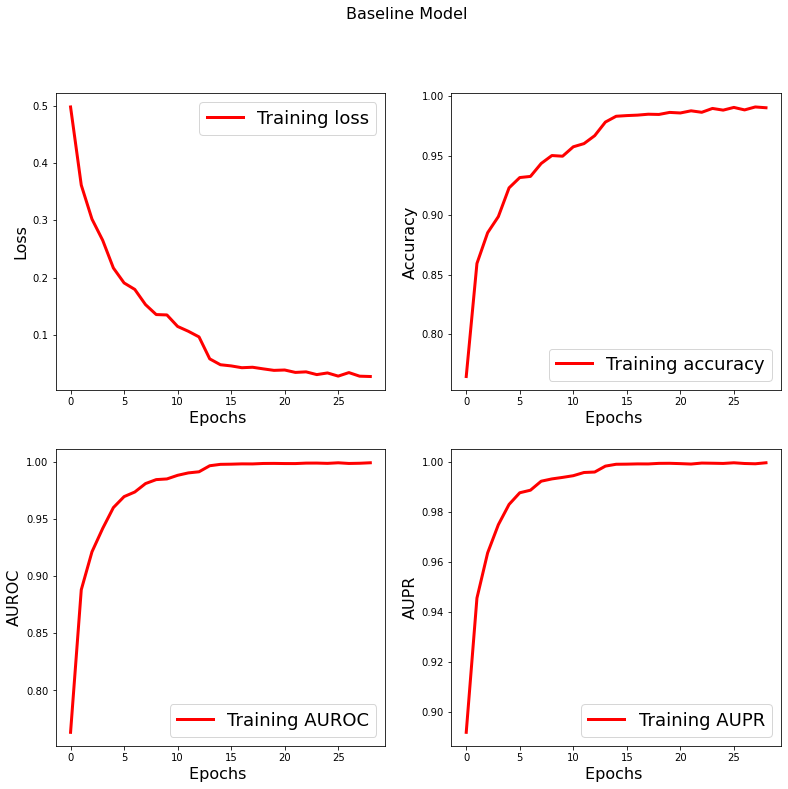

In [18]:
loss = history1.history['loss'] #+ history2.history['loss'] + history3.history['loss'] 
accuracy = history1.history['acc']# + history2.history['acc'] + history3.history['acc']
aucpr = history1.history['auc_1']
aucroc = history1.history['auc']

plt.figure(figsize=(13,12))
plt.suptitle("Baseline Model",fontsize=16)

plt.subplot(2,2,1)
plt.plot(loss,'r',linewidth=3.0)
plt.legend(['Training loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)  

plt.subplot(2,2,2)
plt.plot(accuracy,'r',linewidth=3.0) 
plt.legend(['Training accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16)

plt.subplot(2,2,3)
plt.plot(aucroc,'r',linewidth=3.0) 
plt.legend(['Training AUROC'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('AUROC',fontsize=16)

plt.subplot(2,2,4)
plt.plot(aucpr,'r',linewidth=3.0) 
plt.legend(['Training AUPR'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('AUPR',fontsize=16)

Normalized confusion matrix
[[0.98516687 0.01483313]
 [0.00808754 0.99191246]]


<Figure size 432x288 with 0 Axes>

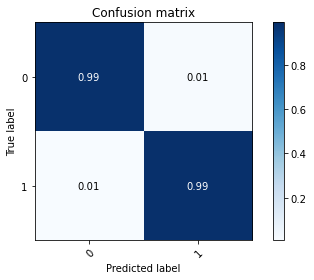

In [19]:
cnf_matrix = confusion_matrix(Y_test, pred_test)
class_names = [str(i) for i in range(2)]

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True)
plt.show()

# Model 2

In [48]:
model2 = get_model2()
file_path = "model2_cnn_ptbdb.h5"
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor="val_acc", mode="max", patience=5, verbose=1)
redonplat = ReduceLROnPlateau(monitor="val_acc", mode="max", patience=3, verbose=2)
callbacks_list = [checkpoint, early, redonplat]  # early

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 187, 1)]          0         
_________________________________________________________________
conv1d_124 (Conv1D)          (None, 183, 16)           96        
_________________________________________________________________
conv1d_125 (Conv1D)          (None, 179, 16)           1296      
_________________________________________________________________
conv1d_126 (Conv1D)          (None, 175, 16)           1296      
_________________________________________________________________
max_pooling1d_27 (MaxPooling (None, 87, 16)            0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 87, 16)            0         
_________________________________________________________________
conv1d_127 (Conv1D)          (None, 84, 32)            2080

In [49]:
history2 = model2.fit(X, Y, epochs=1000, verbose=2, callbacks=callbacks_list, validation_split=0.1)
model2.load_weights(file_path)

Train on 10476 samples, validate on 1165 samples
Epoch 1/1000

Epoch 00001: val_acc improved from -inf to 0.85494, saving model to model2_cnn_ptbdb.h5
10476/10476 - 8s - loss: 0.4776 - auc_2: 0.7878 - auc_3: 0.9066 - acc: 0.7741 - val_loss: 0.3707 - val_auc_2: 0.8911 - val_auc_3: 0.9460 - val_acc: 0.8549
Epoch 2/1000

Epoch 00002: val_acc improved from 0.85494 to 0.86953, saving model to model2_cnn_ptbdb.h5
10476/10476 - 6s - loss: 0.3429 - auc_2: 0.9026 - auc_3: 0.9545 - acc: 0.8583 - val_loss: 0.3268 - val_auc_2: 0.9182 - val_auc_3: 0.9579 - val_acc: 0.8695
Epoch 3/1000

Epoch 00003: val_acc improved from 0.86953 to 0.89013, saving model to model2_cnn_ptbdb.h5
10476/10476 - 6s - loss: 0.3036 - auc_2: 0.9242 - auc_3: 0.9650 - acc: 0.8806 - val_loss: 0.2570 - val_auc_2: 0.9514 - val_auc_3: 0.9783 - val_acc: 0.8901
Epoch 4/1000

Epoch 00004: val_acc improved from 0.89013 to 0.91502, saving model to model2_cnn_ptbdb.h5
10476/10476 - 6s - loss: 0.2476 - auc_2: 0.9495 - auc_3: 0.9778 - acc

In [50]:
pred_test = model2.predict(X_test)
pred_test = (pred_test>0.5).astype(np.int8)

f1 = f1_score(Y_test, pred_test)

print("Test f1 score : %s "% f1)

acc = accuracy_score(Y_test, pred_test)

print("Test accuracy score : %s "% acc)

Test f1 score : 0.9888015248987373 
Test accuracy score : 0.9838543455857094 


Text(0, 0.5, 'AUPR')

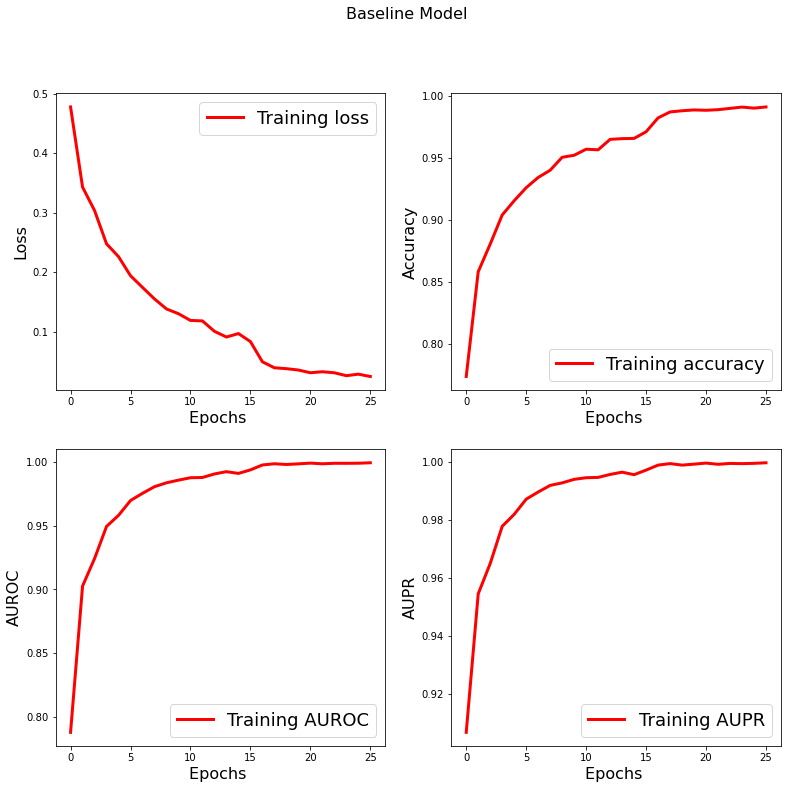

In [52]:
loss = history2.history['loss'] #+ history2.history['loss'] + history3.history['loss'] 
accuracy = history2.history['acc']# + history2.history['acc'] + history3.history['acc']
aucpr = history2.history['auc_3']
aucroc = history2.history['auc_2']

plt.figure(figsize=(13,12))
plt.suptitle("Baseline Model",fontsize=16)

plt.subplot(2,2,1)
plt.plot(loss,'r',linewidth=3.0)
plt.legend(['Training loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)  

plt.subplot(2,2,2)
plt.plot(accuracy,'r',linewidth=3.0) 
plt.legend(['Training accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16)

plt.subplot(2,2,3)
plt.plot(aucroc,'r',linewidth=3.0) 
plt.legend(['Training AUROC'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('AUROC',fontsize=16)

plt.subplot(2,2,4)
plt.plot(aucpr,'r',linewidth=3.0) 
plt.legend(['Training AUPR'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('AUPR',fontsize=16)

Normalized confusion matrix
[[0.97527812 0.02472188]
 [0.01284491 0.98715509]]


<Figure size 432x288 with 0 Axes>

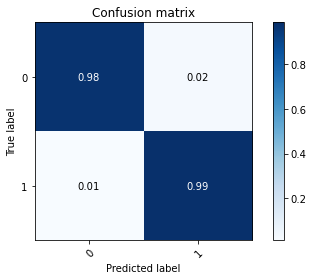

In [53]:
cnf_matrix = confusion_matrix(Y_test, pred_test)
class_names = [str(i) for i in range(2)]

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True)
plt.show()

# Model 3

In [67]:
model3 = get_model3()
file_path = "model3_cnn_ptbdb.h5"
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor="val_acc", mode="max", patience=5, verbose=1)
redonplat = ReduceLROnPlateau(monitor="val_acc", mode="max", patience=3, verbose=2)
callbacks_list = [checkpoint, early, redonplat]  # early

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 187, 1)]          0         
_________________________________________________________________
conv1d_149 (Conv1D)          (None, 183, 16)           96        
_________________________________________________________________
conv1d_150 (Conv1D)          (None, 179, 16)           1296      
_________________________________________________________________
max_pooling1d_33 (MaxPooling (None, 89, 16)            0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 89, 16)            0         
_________________________________________________________________
conv1d_151 (Conv1D)          (None, 87, 32)            1568      
_________________________________________________________________
conv1d_152 (Conv1D)          (None, 85, 32)            310

In [68]:
history3 = model3.fit(X, Y, epochs=1000, verbose=2, callbacks=callbacks_list, validation_split=0.1)
model3.load_weights(file_path)

Train on 10476 samples, validate on 1165 samples
Epoch 1/1000

Epoch 00001: val_acc improved from -inf to 0.80515, saving model to model3_cnn_ptbdb.h5
10476/10476 - 8s - loss: 0.5059 - auc_2: 0.7387 - auc_3: 0.8893 - acc: 0.7360 - val_loss: 0.4384 - val_auc_2: 0.8763 - val_auc_3: 0.9383 - val_acc: 0.8052
Epoch 2/1000

Epoch 00002: val_acc improved from 0.80515 to 0.89614, saving model to model3_cnn_ptbdb.h5
10476/10476 - 5s - loss: 0.3587 - auc_2: 0.8935 - auc_3: 0.9498 - acc: 0.8527 - val_loss: 0.2910 - val_auc_2: 0.9306 - val_auc_3: 0.9574 - val_acc: 0.8961
Epoch 3/1000

Epoch 00003: val_acc improved from 0.89614 to 0.90558, saving model to model3_cnn_ptbdb.h5
10476/10476 - 5s - loss: 0.2739 - auc_2: 0.9376 - auc_3: 0.9712 - acc: 0.8933 - val_loss: 0.2310 - val_auc_2: 0.9616 - val_auc_3: 0.9818 - val_acc: 0.9056
Epoch 4/1000

Epoch 00004: val_acc improved from 0.90558 to 0.91073, saving model to model3_cnn_ptbdb.h5
10476/10476 - 5s - loss: 0.2196 - auc_2: 0.9614 - auc_3: 0.9839 - acc

In [69]:
pred_test = model3.predict(X_test)
pred_test = (pred_test>0.5).astype(np.int8)

f1 = f1_score(Y_test, pred_test)

print("Test f1 score : %s "% f1)

acc = accuracy_score(Y_test, pred_test)

print("Test accuracy score : %s "% acc)

Test f1 score : 0.9911967642160362 
Test accuracy score : 0.9872895912057712 


Text(0, 0.5, 'AUPR')

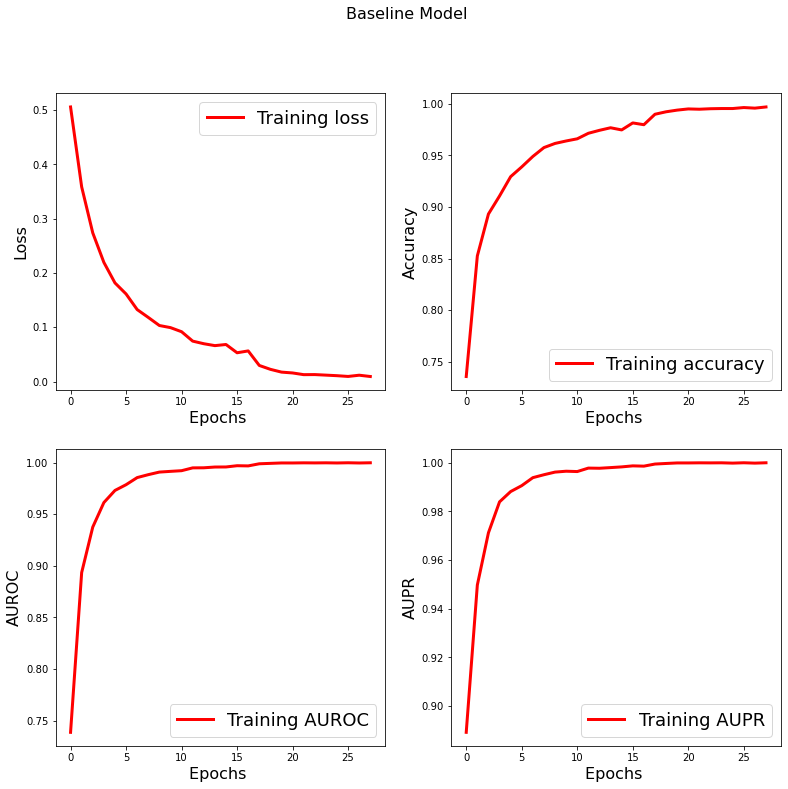

In [71]:
loss = history3.history['loss'] #+ history2.history['loss'] + history3.history['loss'] 
accuracy = history3.history['acc']# + history2.history['acc'] + history3.history['acc']
aucpr = history3.history['auc_3']
aucroc = history3.history['auc_2']

plt.figure(figsize=(13,12))
plt.suptitle("Baseline Model",fontsize=16)

plt.subplot(2,2,1)
plt.plot(loss,'r',linewidth=3.0)
plt.legend(['Training loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)  

plt.subplot(2,2,2)
plt.plot(accuracy,'r',linewidth=3.0) 
plt.legend(['Training accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16)

plt.subplot(2,2,3)
plt.plot(aucroc,'r',linewidth=3.0) 
plt.legend(['Training AUROC'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('AUROC',fontsize=16)

plt.subplot(2,2,4)
plt.plot(aucpr,'r',linewidth=3.0) 
plt.legend(['Training AUPR'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('AUPR',fontsize=16)

Normalized confusion matrix
[[0.97775031 0.02224969]
 [0.00903901 0.99096099]]


<Figure size 432x288 with 0 Axes>

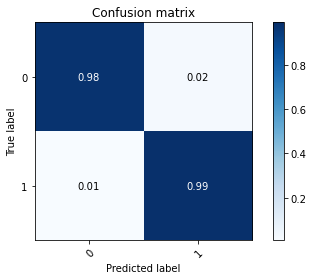

In [72]:
cnf_matrix = confusion_matrix(Y_test, pred_test)
class_names = [str(i) for i in range(2)]

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True)
plt.show()

# Model 4

In [73]:
model4 = get_model4()
file_path = "model4_cnn_ptbdb.h5"
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor="val_acc", mode="max", patience=5, verbose=1)
redonplat = ReduceLROnPlateau(monitor="val_acc", mode="max", patience=3, verbose=2)
callbacks_list = [checkpoint, early, redonplat]  # early

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 187, 1)]          0         
_________________________________________________________________
conv1d_160 (Conv1D)          (None, 183, 16)           96        
_________________________________________________________________
conv1d_161 (Conv1D)          (None, 179, 16)           1296      
_________________________________________________________________
max_pooling1d_36 (MaxPooling (None, 89, 16)            0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 89, 16)            0         
_________________________________________________________________
conv1d_162 (Conv1D)          (None, 87, 32)            1568      
_________________________________________________________________
conv1d_163 (Conv1D)          (None, 85, 32)            310

In [74]:
history4 = model4.fit(X, Y, epochs=1000, verbose=2, callbacks=callbacks_list, validation_split=0.1)
model4.load_weights(file_path)

Train on 10476 samples, validate on 1165 samples
Epoch 1/1000

Epoch 00001: val_acc improved from -inf to 0.69957, saving model to model4_cnn_ptbdb.h5
10476/10476 - 12s - loss: 0.5507 - auc_2: 0.6529 - auc_3: 0.8445 - acc: 0.7236 - val_loss: 0.6237 - val_auc_2: 0.5485 - val_auc_3: 0.7659 - val_acc: 0.6996
Epoch 2/1000

Epoch 00002: val_acc did not improve from 0.69957
10476/10476 - 9s - loss: 0.5015 - auc_2: 0.7523 - auc_3: 0.8946 - acc: 0.7254 - val_loss: 0.5077 - val_auc_2: 0.8280 - val_auc_3: 0.9249 - val_acc: 0.6987
Epoch 3/1000

Epoch 00003: val_acc improved from 0.69957 to 0.81288, saving model to model4_cnn_ptbdb.h5
10476/10476 - 10s - loss: 0.4401 - auc_2: 0.8296 - auc_3: 0.9271 - acc: 0.7779 - val_loss: 0.4202 - val_auc_2: 0.9031 - val_auc_3: 0.9523 - val_acc: 0.8129
Epoch 4/1000

Epoch 00004: val_acc improved from 0.81288 to 0.85150, saving model to model4_cnn_ptbdb.h5
10476/10476 - 10s - loss: 0.3744 - auc_2: 0.8831 - auc_3: 0.9478 - acc: 0.8381 - val_loss: 0.3519 - val_auc_

In [75]:
pred_test = model4.predict(X_test)
pred_test = (pred_test>0.5).astype(np.int8)

f1 = f1_score(Y_test, pred_test)

print("Test f1 score : %s "% f1)

acc = accuracy_score(Y_test, pred_test)

print("Test accuracy score : %s "% acc)

Test f1 score : 0.9924242424242425 
Test accuracy score : 0.9890072140158022 


Text(0, 0.5, 'AUPR')

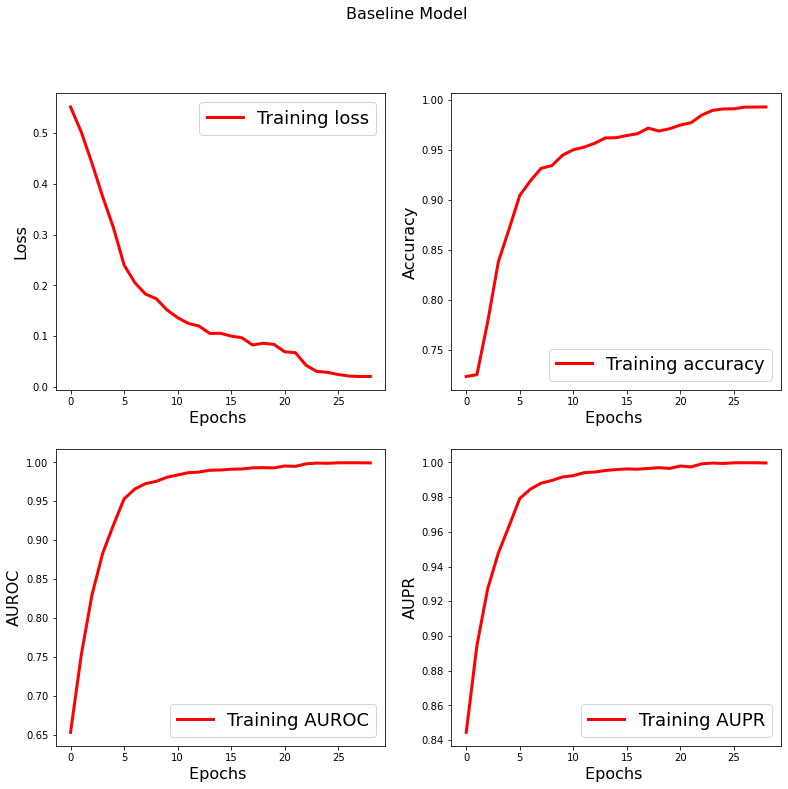

In [76]:
loss = history4.history['loss'] #+ history2.history['loss'] + history3.history['loss'] 
accuracy = history4.history['acc']# + history2.history['acc'] + history3.history['acc']
aucpr = history4.history['auc_3']
aucroc = history4.history['auc_2']

plt.figure(figsize=(13,12))
plt.suptitle("Baseline Model",fontsize=16)

plt.subplot(2,2,1)
plt.plot(loss,'r',linewidth=3.0)
plt.legend(['Training loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)  

plt.subplot(2,2,2)
plt.plot(accuracy,'r',linewidth=3.0) 
plt.legend(['Training accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16)

plt.subplot(2,2,3)
plt.plot(aucroc,'r',linewidth=3.0) 
plt.legend(['Training AUROC'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('AUROC',fontsize=16)

plt.subplot(2,2,4)
plt.plot(aucpr,'r',linewidth=3.0) 
plt.legend(['Training AUPR'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('AUPR',fontsize=16)

Normalized confusion matrix
[[0.96786156 0.03213844]
 [0.00285442 0.99714558]]


<Figure size 432x288 with 0 Axes>

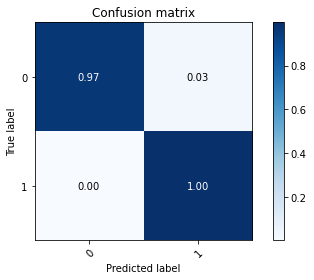

In [77]:
cnf_matrix = confusion_matrix(Y_test, pred_test)
class_names = [str(i) for i in range(2)]

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True)
plt.show()

# Model 5

In [78]:
model5 = get_model5()
file_path = "model5_cnn_ptbdb.h5"
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor="val_acc", mode="max", patience=5, verbose=1)
redonplat = ReduceLROnPlateau(monitor="val_acc", mode="max", patience=3, verbose=2)
callbacks_list = [checkpoint, early, redonplat]  # early

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 187, 1)]          0         
_________________________________________________________________
conv1d_174 (Conv1D)          (None, 183, 16)           96        
_________________________________________________________________
conv1d_175 (Conv1D)          (None, 179, 16)           1296      
_________________________________________________________________
conv1d_176 (Conv1D)          (None, 177, 16)           784       
_________________________________________________________________
conv1d_177 (Conv1D)          (None, 175, 16)           784       
_________________________________________________________________
conv1d_178 (Conv1D)          (None, 173, 16)           784       
_________________________________________________________________
max_pooling1d_38 (MaxPooling (None, 86, 16)            0  

In [79]:
history5 = model5.fit(X, Y, epochs=1000, verbose=2, callbacks=callbacks_list, validation_split=0.1)
model5.load_weights(file_path)

Train on 10476 samples, validate on 1165 samples
Epoch 1/1000

Epoch 00001: val_acc improved from -inf to 0.69957, saving model to model5_cnn_ptbdb.h5
10476/10476 - 15s - loss: 0.5511 - auc_2: 0.6653 - auc_3: 0.8443 - acc: 0.7234 - val_loss: 0.5087 - val_auc_2: 0.7786 - val_auc_3: 0.8960 - val_acc: 0.6996
Epoch 2/1000

Epoch 00002: val_acc improved from 0.69957 to 0.79227, saving model to model5_cnn_ptbdb.h5
10476/10476 - 10s - loss: 0.4951 - auc_2: 0.7617 - auc_3: 0.8996 - acc: 0.7285 - val_loss: 0.4492 - val_auc_2: 0.8502 - val_auc_3: 0.9318 - val_acc: 0.7923
Epoch 3/1000

Epoch 00003: val_acc improved from 0.79227 to 0.79828, saving model to model5_cnn_ptbdb.h5
10476/10476 - 10s - loss: 0.4272 - auc_2: 0.8419 - auc_3: 0.9351 - acc: 0.7866 - val_loss: 0.4117 - val_auc_2: 0.8656 - val_auc_3: 0.9407 - val_acc: 0.7983
Epoch 4/1000

Epoch 00004: val_acc improved from 0.79828 to 0.83777, saving model to model5_cnn_ptbdb.h5
10476/10476 - 10s - loss: 0.3876 - auc_2: 0.8763 - auc_3: 0.9477 -

In [80]:
pred_test = model5.predict(X_test)
pred_test = (pred_test>0.5).astype(np.int8)

f1 = f1_score(Y_test, pred_test)

print("Test f1 score : %s "% f1)

acc = accuracy_score(Y_test, pred_test)

print("Test accuracy score : %s "% acc)

Test f1 score : 0.9865024863840872 
Test accuracy score : 0.9804190999656476 


Text(0, 0.5, 'AUPR')

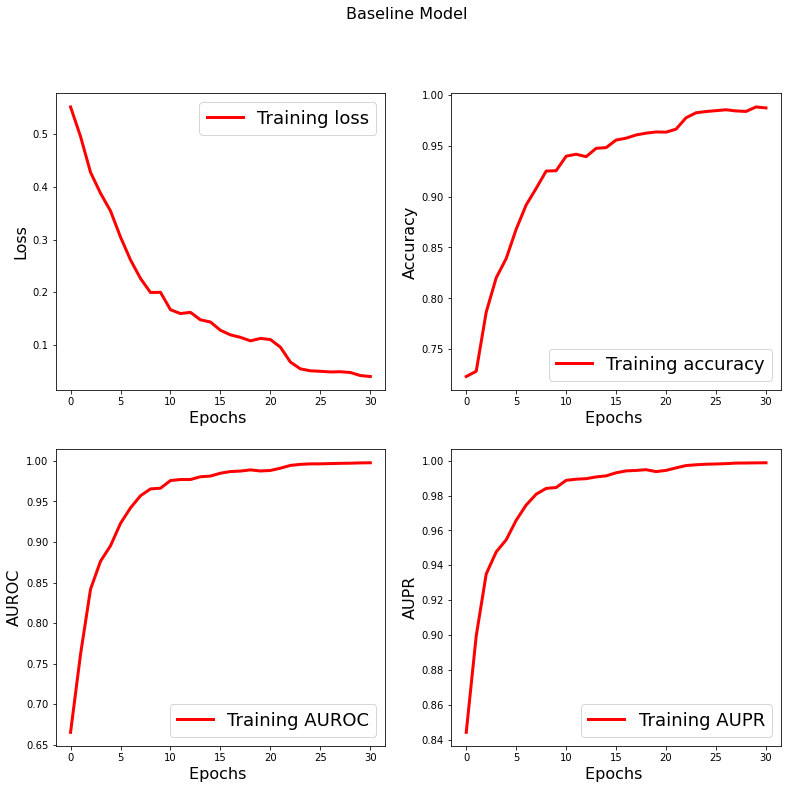

In [81]:
loss = history5.history['loss'] #+ history2.history['loss'] + history3.history['loss'] 
accuracy = history5.history['acc']# + history2.history['acc'] + history3.history['acc']
aucpr = history5.history['auc_3']
aucroc = history5.history['auc_2']

plt.figure(figsize=(13,12))
plt.suptitle("Baseline Model",fontsize=16)

plt.subplot(2,2,1)
plt.plot(loss,'r',linewidth=3.0)
plt.legend(['Training loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)  

plt.subplot(2,2,2)
plt.plot(accuracy,'r',linewidth=3.0) 
plt.legend(['Training accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16)

plt.subplot(2,2,3)
plt.plot(aucroc,'r',linewidth=3.0) 
plt.legend(['Training AUROC'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('AUROC',fontsize=16)

plt.subplot(2,2,4)
plt.plot(aucpr,'r',linewidth=3.0) 
plt.legend(['Training AUPR'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('AUPR',fontsize=16)

Normalized confusion matrix
[[0.95302843 0.04697157]
 [0.00903901 0.99096099]]


<Figure size 432x288 with 0 Axes>

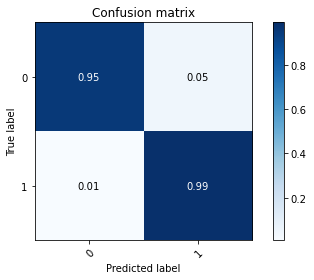

In [82]:
cnf_matrix = confusion_matrix(Y_test, pred_test)
class_names = [str(i) for i in range(2)]

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True)
plt.show()

# Model 6

In [83]:
model6 = get_model6()
file_path = "model6_cnn_ptbdb.h5"
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor="val_acc", mode="max", patience=5, verbose=1)
redonplat = ReduceLROnPlateau(monitor="val_acc", mode="max", patience=3, verbose=2)
callbacks_list = [checkpoint, early, redonplat]  # early

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 187, 1)]          0         
_________________________________________________________________
conv1d_194 (Conv1D)          (None, 183, 16)           96        
_________________________________________________________________
conv1d_195 (Conv1D)          (None, 179, 16)           1296      
_________________________________________________________________
max_pooling1d_40 (MaxPooling (None, 89, 16)            0         
_________________________________________________________________
dropout_46 (Dropout)         (None, 89, 16)            0         
_________________________________________________________________
conv1d_196 (Conv1D)          (None, 87, 32)            1568      
_________________________________________________________________
conv1d_197 (Conv1D)          (None, 85, 32)            310

In [84]:
history6 = model6.fit(X, Y, epochs=1000, verbose=2, callbacks=callbacks_list, validation_split=0.1)
model6.load_weights(file_path)

Train on 10476 samples, validate on 1165 samples
Epoch 1/1000

Epoch 00001: val_acc improved from -inf to 0.84979, saving model to model6_cnn_ptbdb.h5
10476/10476 - 7s - loss: 0.4597 - auc_2: 0.8095 - auc_3: 0.9144 - acc: 0.7836 - val_loss: 0.3663 - val_auc_2: 0.9118 - val_auc_3: 0.9604 - val_acc: 0.8498
Epoch 2/1000

Epoch 00002: val_acc improved from 0.84979 to 0.88498, saving model to model6_cnn_ptbdb.h5
10476/10476 - 4s - loss: 0.3230 - auc_2: 0.9156 - auc_3: 0.9627 - acc: 0.8648 - val_loss: 0.2805 - val_auc_2: 0.9483 - val_auc_3: 0.9786 - val_acc: 0.8850
Epoch 3/1000

Epoch 00003: val_acc improved from 0.88498 to 0.90043, saving model to model6_cnn_ptbdb.h5
10476/10476 - 4s - loss: 0.2673 - auc_2: 0.9435 - auc_3: 0.9771 - acc: 0.8902 - val_loss: 0.2464 - val_auc_2: 0.9560 - val_auc_3: 0.9814 - val_acc: 0.9004
Epoch 4/1000

Epoch 00004: val_acc improved from 0.90043 to 0.92790, saving model to model6_cnn_ptbdb.h5
10476/10476 - 4s - loss: 0.2300 - auc_2: 0.9583 - auc_3: 0.9832 - acc

In [85]:
pred_test = model6.predict(X_test)
pred_test = (pred_test>0.5).astype(np.int8)

f1 = f1_score(Y_test, pred_test)

print("Test f1 score : %s "% f1)

acc = accuracy_score(Y_test, pred_test)

print("Test accuracy score : %s "% acc)

Test f1 score : 0.9916607100309744 
Test accuracy score : 0.9879766403297836 


Text(0, 0.5, 'AUPR')

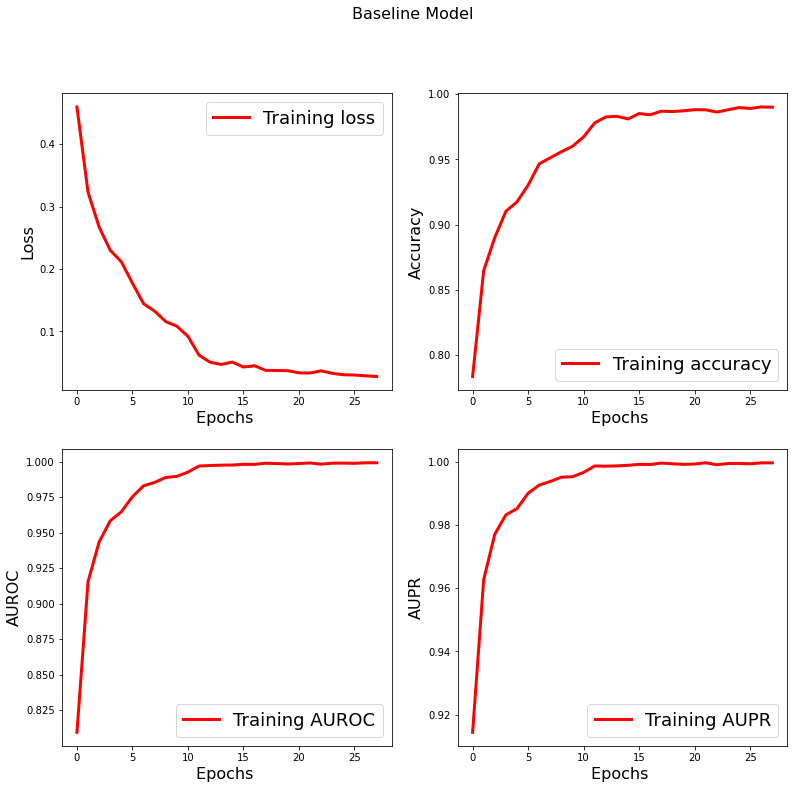

In [86]:
loss = history6.history['loss'] #+ history2.history['loss'] + history3.history['loss'] 
accuracy = history6.history['acc']# + history2.history['acc'] + history3.history['acc']
aucpr = history6.history['auc_3']
aucroc = history6.history['auc_2']

plt.figure(figsize=(13,12))
plt.suptitle("Baseline Model",fontsize=16)

plt.subplot(2,2,1)
plt.plot(loss,'r',linewidth=3.0)
plt.legend(['Training loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)  

plt.subplot(2,2,2)
plt.plot(accuracy,'r',linewidth=3.0) 
plt.legend(['Training accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16)

plt.subplot(2,2,3)
plt.plot(aucroc,'r',linewidth=3.0) 
plt.legend(['Training AUROC'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('AUROC',fontsize=16)

plt.subplot(2,2,4)
plt.plot(aucpr,'r',linewidth=3.0) 
plt.legend(['Training AUPR'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('AUPR',fontsize=16)

Normalized confusion matrix
[[0.98269468 0.01730532]
 [0.00999049 0.99000951]]


<Figure size 432x288 with 0 Axes>

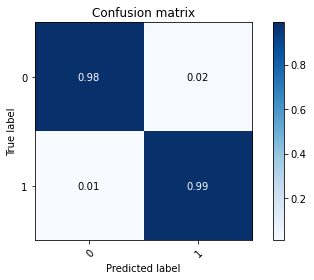

In [87]:
cnf_matrix = confusion_matrix(Y_test, pred_test)
class_names = [str(i) for i in range(2)]

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True)
plt.show()

# Model 7

In [88]:
model7 = get_model7()
file_path = "model7_cnn_ptbdb.h5"
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor="val_acc", mode="max", patience=5, verbose=1)
redonplat = ReduceLROnPlateau(monitor="val_acc", mode="max", patience=3, verbose=2)
callbacks_list = [checkpoint, early, redonplat]  # early

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 187, 1)]          0         
_________________________________________________________________
conv1d_204 (Conv1D)          (None, 183, 16)           96        
_________________________________________________________________
conv1d_205 (Conv1D)          (None, 179, 16)           1296      
_________________________________________________________________
conv1d_206 (Conv1D)          (None, 175, 16)           1296      
_________________________________________________________________
max_pooling1d_44 (MaxPooling (None, 87, 16)            0         
_________________________________________________________________
dropout_51 (Dropout)         (None, 87, 16)            0         
_________________________________________________________________
conv1d_207 (Conv1D)          (None, 85, 32)            156

In [89]:
history7 = model7.fit(X, Y, epochs=1000, verbose=2, callbacks=callbacks_list, validation_split=0.1)
model7.load_weights(file_path)

Train on 10476 samples, validate on 1165 samples
Epoch 1/1000

Epoch 00001: val_acc improved from -inf to 0.83262, saving model to model7_cnn_ptbdb.h5
10476/10476 - 10s - loss: 0.4717 - auc_2: 0.7972 - auc_3: 0.9116 - acc: 0.7731 - val_loss: 0.3747 - val_auc_2: 0.9100 - val_auc_3: 0.9550 - val_acc: 0.8326
Epoch 2/1000

Epoch 00002: val_acc improved from 0.83262 to 0.85579, saving model to model7_cnn_ptbdb.h5
10476/10476 - 5s - loss: 0.3179 - auc_2: 0.9192 - auc_3: 0.9650 - acc: 0.8646 - val_loss: 0.3069 - val_auc_2: 0.9364 - val_auc_3: 0.9714 - val_acc: 0.8558
Epoch 3/1000

Epoch 00003: val_acc improved from 0.85579 to 0.91588, saving model to model7_cnn_ptbdb.h5
10476/10476 - 6s - loss: 0.2604 - auc_2: 0.9464 - auc_3: 0.9778 - acc: 0.8942 - val_loss: 0.2156 - val_auc_2: 0.9678 - val_auc_3: 0.9864 - val_acc: 0.9159
Epoch 4/1000

Epoch 00004: val_acc improved from 0.91588 to 0.92275, saving model to model7_cnn_ptbdb.h5
10476/10476 - 6s - loss: 0.2335 - auc_2: 0.9571 - auc_3: 0.9819 - ac

In [90]:
pred_test = model7.predict(X_test)
pred_test = (pred_test>0.5).astype(np.int8)

f1 = f1_score(Y_test, pred_test)

print("Test f1 score : %s "% f1)

acc = accuracy_score(Y_test, pred_test)

print("Test accuracy score : %s "% acc)

Test f1 score : 0.9902450630502023 
Test accuracy score : 0.9859154929577465 


Text(0, 0.5, 'AUPR')

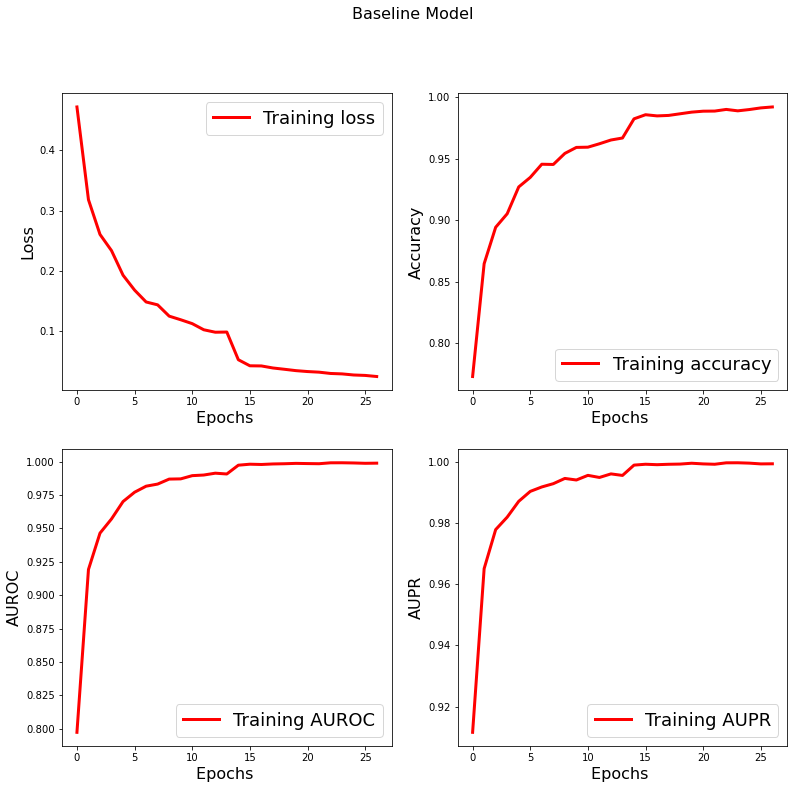

In [91]:
loss = history7.history['loss'] #+ history2.history['loss'] + history3.history['loss'] 
accuracy = history7.history['acc']# + history2.history['acc'] + history3.history['acc']
aucpr = history7.history['auc_3']
aucroc = history7.history['auc_2']

plt.figure(figsize=(13,12))
plt.suptitle("Baseline Model",fontsize=16)

plt.subplot(2,2,1)
plt.plot(loss,'r',linewidth=3.0)
plt.legend(['Training loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)  

plt.subplot(2,2,2)
plt.plot(accuracy,'r',linewidth=3.0) 
plt.legend(['Training accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16)

plt.subplot(2,2,3)
plt.plot(aucroc,'r',linewidth=3.0) 
plt.legend(['Training AUROC'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('AUROC',fontsize=16)

plt.subplot(2,2,4)
plt.plot(aucpr,'r',linewidth=3.0) 
plt.legend(['Training AUPR'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('AUPR',fontsize=16)

Normalized confusion matrix
[[0.97527812 0.02472188]
 [0.00999049 0.99000951]]


<Figure size 432x288 with 0 Axes>

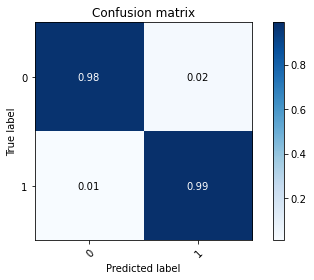

In [92]:
cnf_matrix = confusion_matrix(Y_test, pred_test)
class_names = [str(i) for i in range(2)]

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True)
plt.show()

# Model 8

In [93]:
model8 = get_model8()
file_path = "model8_cnn_ptbdb.h5"
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor="val_acc", mode="max", patience=5, verbose=1)
redonplat = ReduceLROnPlateau(monitor="val_acc", mode="max", patience=3, verbose=2)
callbacks_list = [checkpoint, early, redonplat]  # early

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 187, 1)]          0         
_________________________________________________________________
conv1d_219 (Conv1D)          (None, 183, 16)           96        
_________________________________________________________________
conv1d_220 (Conv1D)          (None, 179, 16)           1296      
_________________________________________________________________
conv1d_221 (Conv1D)          (None, 175, 32)           2592      
_________________________________________________________________
conv1d_222 (Conv1D)          (None, 171, 32)           5152      
_________________________________________________________________
max_pooling1d_48 (MaxPooling (None, 85, 32)            0         
_________________________________________________________________
dropout_56 (Dropout)         (None, 85, 32)            0  

In [94]:
history8 = model8.fit(X, Y, epochs=1000, verbose=2, callbacks=callbacks_list, validation_split=0.1)
model8.load_weights(file_path)

Train on 10476 samples, validate on 1165 samples
Epoch 1/1000

Epoch 00001: val_acc improved from -inf to 0.69957, saving model to model8_cnn_ptbdb.h5
10476/10476 - 17s - loss: 0.5372 - auc_2: 0.6846 - auc_3: 0.8624 - acc: 0.7228 - val_loss: 0.5510 - val_auc_2: 0.6568 - val_auc_3: 0.8472 - val_acc: 0.6996
Epoch 2/1000

Epoch 00002: val_acc did not improve from 0.69957
10476/10476 - 12s - loss: 0.5898 - auc_2: 0.5150 - auc_3: 0.7445 - acc: 0.7244 - val_loss: 0.6114 - val_auc_2: 0.5000 - val_auc_3: 0.6996 - val_acc: 0.6996
Epoch 3/1000

Epoch 00003: val_acc did not improve from 0.69957
10476/10476 - 12s - loss: 0.5899 - auc_2: 0.5012 - auc_3: 0.7210 - acc: 0.7244 - val_loss: 0.6112 - val_auc_2: 0.5000 - val_auc_3: 0.6996 - val_acc: 0.6996
Epoch 4/1000

Epoch 00004: val_acc did not improve from 0.69957

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
10476/10476 - 12s - loss: 0.5895 - auc_2: 0.4986 - auc_3: 0.7213 - acc: 0.7244 - val_loss: 0.6112 - val_auc

In [95]:
pred_test = model8.predict(X_test)
pred_test = (pred_test>0.5).astype(np.int8)

f1 = f1_score(Y_test, pred_test)

print("Test f1 score : %s "% f1)

acc = accuracy_score(Y_test, pred_test)

print("Test accuracy score : %s "% acc)

Test f1 score : 0.8386195890684222 
Test accuracy score : 0.7220886293369976 


Text(0, 0.5, 'AUPR')

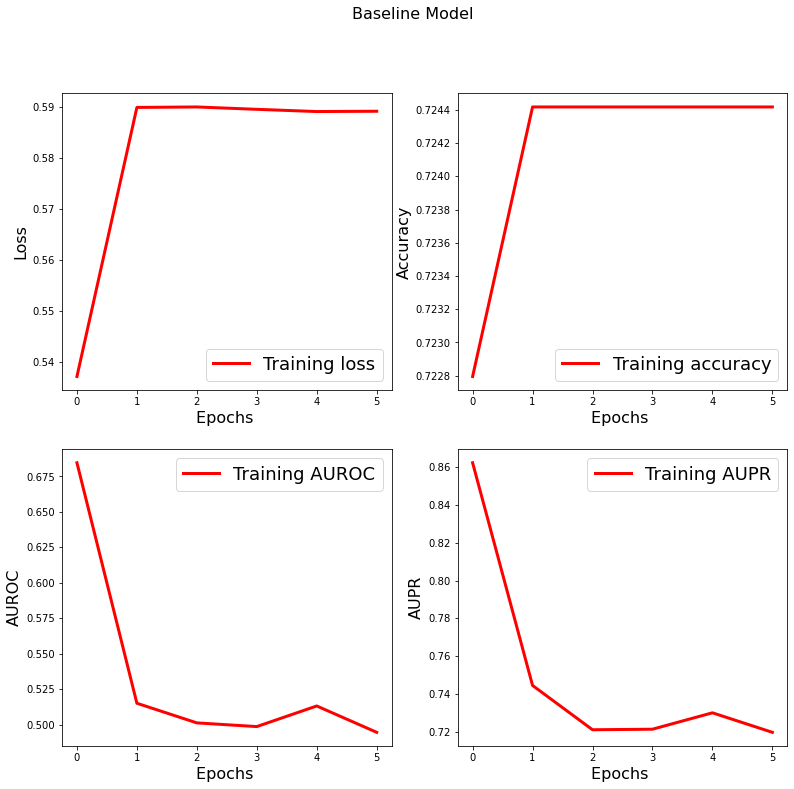

In [96]:
loss = history8.history['loss'] #+ history2.history['loss'] + history3.history['loss'] 
accuracy = history8.history['acc']# + history2.history['acc'] + history3.history['acc']
aucpr = history8.history['auc_3']
aucroc = history8.history['auc_2']

plt.figure(figsize=(13,12))
plt.suptitle("Baseline Model",fontsize=16)

plt.subplot(2,2,1)
plt.plot(loss,'r',linewidth=3.0)
plt.legend(['Training loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)  

plt.subplot(2,2,2)
plt.plot(accuracy,'r',linewidth=3.0) 
plt.legend(['Training accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16)

plt.subplot(2,2,3)
plt.plot(aucroc,'r',linewidth=3.0) 
plt.legend(['Training AUROC'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('AUROC',fontsize=16)

plt.subplot(2,2,4)
plt.plot(aucpr,'r',linewidth=3.0) 
plt.legend(['Training AUPR'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('AUPR',fontsize=16)

Normalized confusion matrix
[[0. 1.]
 [0. 1.]]


<Figure size 432x288 with 0 Axes>

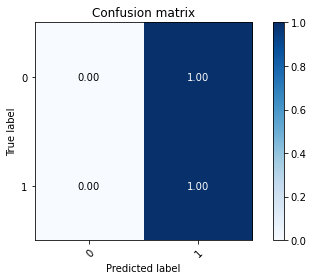

In [97]:
cnf_matrix = confusion_matrix(Y_test, pred_test)
class_names = [str(i) for i in range(2)]

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True)
plt.show()

# Model 9

In [98]:
model9 = get_model9()
file_path = "model9_cnn_ptbdb.h5"
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor="val_acc", mode="max", patience=5, verbose=1)
redonplat = ReduceLROnPlateau(monitor="val_acc", mode="max", patience=3, verbose=2)
callbacks_list = [checkpoint, early, redonplat]  # early

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 187, 1)]          0         
_________________________________________________________________
conv1d_235 (Conv1D)          (None, 183, 16)           96        
_________________________________________________________________
conv1d_236 (Conv1D)          (None, 179, 16)           1296      
_________________________________________________________________
conv1d_237 (Conv1D)          (None, 176, 16)           1040      
_________________________________________________________________
conv1d_238 (Conv1D)          (None, 173, 16)           1040      
_________________________________________________________________
max_pooling1d_50 (MaxPooling (None, 86, 16)            0         
_________________________________________________________________
dropout_59 (Dropout)         (None, 86, 16)            0  

In [99]:
history9 = model9.fit(X, Y, epochs=1000, verbose=2, callbacks=callbacks_list, validation_split=0.1)
model9.load_weights(file_path)

Train on 10476 samples, validate on 1165 samples
Epoch 1/1000

Epoch 00001: val_acc improved from -inf to 0.69957, saving model to model9_cnn_ptbdb.h5
10476/10476 - 15s - loss: 0.5690 - auc_2: 0.6142 - auc_3: 0.8152 - acc: 0.7237 - val_loss: 0.6120 - val_auc_2: 0.5000 - val_auc_3: 0.6996 - val_acc: 0.6996
Epoch 2/1000

Epoch 00002: val_acc did not improve from 0.69957
10476/10476 - 8s - loss: 0.5915 - auc_2: 0.4997 - auc_3: 0.7248 - acc: 0.7244 - val_loss: 0.6143 - val_auc_2: 0.5000 - val_auc_3: 0.6996 - val_acc: 0.6996
Epoch 3/1000

Epoch 00003: val_acc did not improve from 0.69957
10476/10476 - 8s - loss: 0.5899 - auc_2: 0.5018 - auc_3: 0.7252 - acc: 0.7244 - val_loss: 0.6120 - val_auc_2: 0.5000 - val_auc_3: 0.6996 - val_acc: 0.6996
Epoch 4/1000

Epoch 00004: val_acc did not improve from 0.69957

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
10476/10476 - 9s - loss: 0.5899 - auc_2: 0.4991 - auc_3: 0.7232 - acc: 0.7244 - val_loss: 0.6116 - val_auc_2:

In [113]:
pred_test = model9.predict(X_test)
pred_test = (pred_test>0.5).astype(np.int8)

f1 = f1_score(Y_test, pred_test)

print("Test f1 score : %s "% f1)

acc = accuracy_score(Y_test, pred_test)

print("Test accuracy score : %s "% acc)

Test f1 score : 0.8386195890684222 
Test accuracy score : 0.7220886293369976 


Text(0, 0.5, 'AUPR')

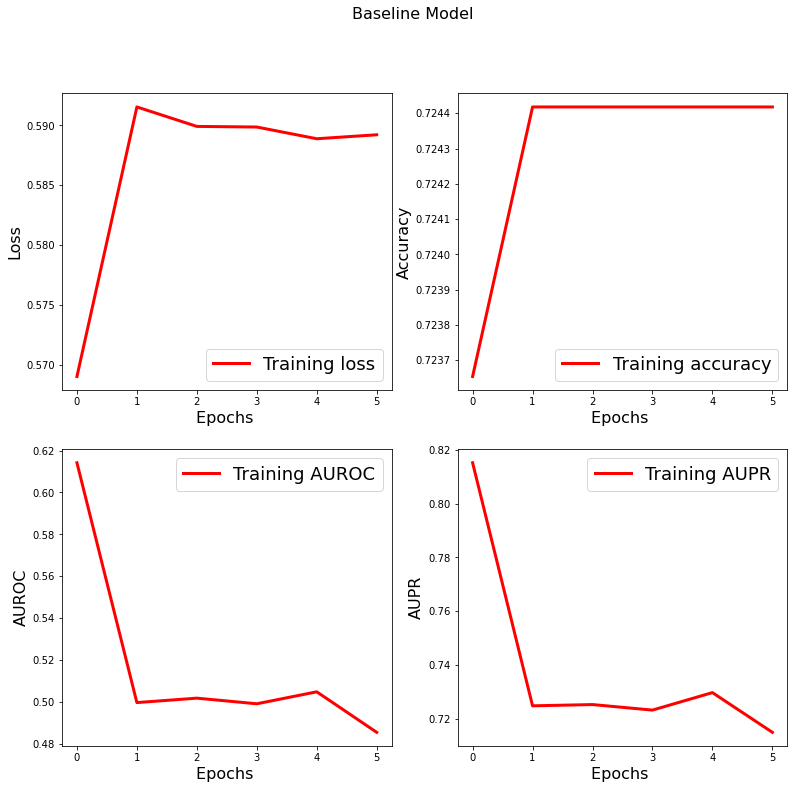

In [114]:
loss = history9.history['loss'] #+ history2.history['loss'] + history3.history['loss'] 
accuracy = history9.history['acc']# + history2.history['acc'] + history3.history['acc']
aucpr = history9.history['auc_3']
aucroc = history9.history['auc_2']

plt.figure(figsize=(13,12))
plt.suptitle("Baseline Model",fontsize=16)

plt.subplot(2,2,1)
plt.plot(loss,'r',linewidth=3.0)
plt.legend(['Training loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)  

plt.subplot(2,2,2)
plt.plot(accuracy,'r',linewidth=3.0) 
plt.legend(['Training accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16)

plt.subplot(2,2,3)
plt.plot(aucroc,'r',linewidth=3.0) 
plt.legend(['Training AUROC'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('AUROC',fontsize=16)

plt.subplot(2,2,4)
plt.plot(aucpr,'r',linewidth=3.0) 
plt.legend(['Training AUPR'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('AUPR',fontsize=16)

Normalized confusion matrix
[[0. 1.]
 [0. 1.]]


<Figure size 432x288 with 0 Axes>

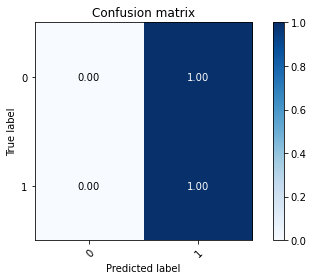

In [115]:
cnf_matrix = confusion_matrix(Y_test, pred_test)
class_names = [str(i) for i in range(2)]

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True)
plt.show()

# Model 10

In [103]:
model10 = get_model10()
file_path = "model10_cnn_ptbdb.h5"
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor="val_acc", mode="max", patience=5, verbose=1)
redonplat = ReduceLROnPlateau(monitor="val_acc", mode="max", patience=3, verbose=2)
callbacks_list = [checkpoint, early, redonplat]  # early

Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 187, 1)]          0         
_________________________________________________________________
conv1d_257 (Conv1D)          (None, 183, 16)           96        
_________________________________________________________________
conv1d_258 (Conv1D)          (None, 179, 16)           1296      
_________________________________________________________________
conv1d_259 (Conv1D)          (None, 175, 16)           1296      
_________________________________________________________________
conv1d_260 (Conv1D)          (None, 171, 16)           1296      
_________________________________________________________________
conv1d_261 (Conv1D)          (None, 168, 32)           2080      
_________________________________________________________________
conv1d_262 (Conv1D)          (None, 165, 32)           412

In [104]:
history10 = model10.fit(X, Y, epochs=1000, verbose=2, callbacks=callbacks_list, validation_split=0.1)
model10.load_weights(file_path)

Train on 10476 samples, validate on 1165 samples
Epoch 1/1000

Epoch 00001: val_acc improved from -inf to 0.69957, saving model to model10_cnn_ptbdb.h5
10476/10476 - 24s - loss: 0.5960 - auc_2: 0.4905 - auc_3: 0.7191 - acc: 0.7242 - val_loss: 0.6112 - val_auc_2: 0.5000 - val_auc_3: 0.6996 - val_acc: 0.6996
Epoch 2/1000

Epoch 00002: val_acc did not improve from 0.69957
10476/10476 - 15s - loss: 0.5913 - auc_2: 0.4969 - auc_3: 0.7254 - acc: 0.7244 - val_loss: 0.6113 - val_auc_2: 0.5000 - val_auc_3: 0.6996 - val_acc: 0.6996
Epoch 3/1000

Epoch 00003: val_acc did not improve from 0.69957
10476/10476 - 16s - loss: 0.5900 - auc_2: 0.4966 - auc_3: 0.7236 - acc: 0.7244 - val_loss: 0.6115 - val_auc_2: 0.5000 - val_auc_3: 0.6996 - val_acc: 0.6996
Epoch 4/1000

Epoch 00004: val_acc did not improve from 0.69957

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
10476/10476 - 16s - loss: 0.5904 - auc_2: 0.4875 - auc_3: 0.7179 - acc: 0.7244 - val_loss: 0.6162 - val_au

In [111]:
pred_test = model10.predict(X_test)
pred_test = (pred_test>0.5).astype(np.int8)

f1 = f1_score(Y_test, pred_test)

print("Test f1 score : %s "% f1)

acc = accuracy_score(Y_test, pred_test)

print("Test accuracy score : %s "% acc)

Test f1 score : 0.8386195890684222 
Test accuracy score : 0.7220886293369976 


Text(0, 0.5, 'AUPR')

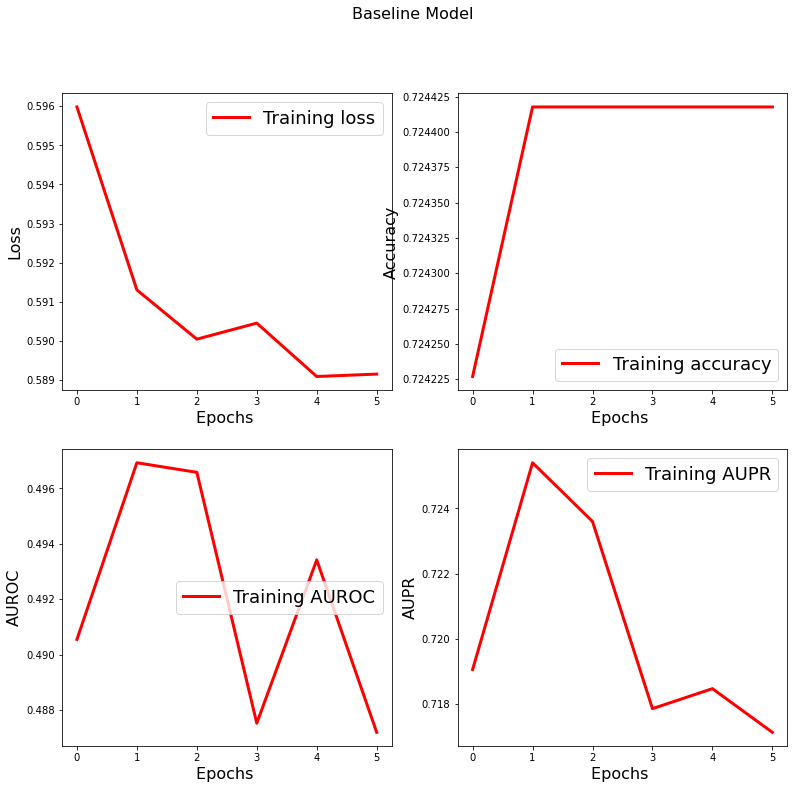

In [110]:
loss = history10.history['loss'] #+ history2.history['loss'] + history3.history['loss'] 
accuracy = history10.history['acc']# + history2.history['acc'] + history3.history['acc']
aucpr = history10.history['auc_3']
aucroc = history10.history['auc_2']

plt.figure(figsize=(13,12))
plt.suptitle("Baseline Model",fontsize=16)

plt.subplot(2,2,1)
plt.plot(loss,'r',linewidth=3.0)
plt.legend(['Training loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)  

plt.subplot(2,2,2)
plt.plot(accuracy,'r',linewidth=3.0) 
plt.legend(['Training accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16)

plt.subplot(2,2,3)
plt.plot(aucroc,'r',linewidth=3.0) 
plt.legend(['Training AUROC'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('AUROC',fontsize=16)

plt.subplot(2,2,4)
plt.plot(aucpr,'r',linewidth=3.0) 
plt.legend(['Training AUPR'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('AUPR',fontsize=16)

Normalized confusion matrix
[[0. 1.]
 [0. 1.]]


<Figure size 432x288 with 0 Axes>

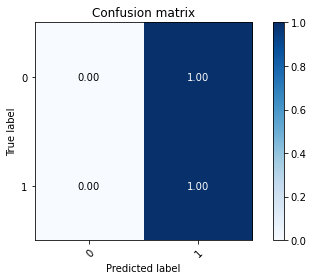

In [112]:
cnf_matrix = confusion_matrix(Y_test, pred_test)
class_names = [str(i) for i in range(2)]

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True)
plt.show()

# Baseline

In [116]:
def get_model():
    nclass = 1
    inp = Input(shape=(187, 1))
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(inp)
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = GlobalMaxPool1D()(img_1)
    img_1 = Dropout(rate=0.2)(img_1)

    dense_1 = Dense(64, activation=activations.relu, name="dense_1")(img_1)
    dense_1 = Dense(64, activation=activations.relu, name="dense_2")(dense_1)
    dense_1 = Dense(nclass, activation=activations.sigmoid, name="dense_3_ptbdb")(dense_1)

    model = models.Model(inputs=inp, outputs=dense_1)
    opt = optimizers.Adam(0.001)

    model.compile(optimizer=opt, loss=losses.binary_crossentropy, metrics=[AUCROC, AUCPR, 'acc'])
    model.summary()
    return model

In [117]:
model = get_model()
file_path = "baseline_cnn_ptbdb.h5"
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor="val_acc", mode="max", patience=5, verbose=1)
redonplat = ReduceLROnPlateau(monitor="val_acc", mode="max", patience=3, verbose=2)
callbacks_list = [checkpoint, early, redonplat]  # early

Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        [(None, 187, 1)]          0         
_________________________________________________________________
conv1d_290 (Conv1D)          (None, 183, 16)           96        
_________________________________________________________________
conv1d_291 (Conv1D)          (None, 179, 16)           1296      
_________________________________________________________________
max_pooling1d_60 (MaxPooling (None, 89, 16)            0         
_________________________________________________________________
dropout_69 (Dropout)         (None, 89, 16)            0         
_________________________________________________________________
conv1d_292 (Conv1D)          (None, 87, 32)            1568      
_________________________________________________________________
conv1d_293 (Conv1D)          (None, 85, 32)            310

In [118]:
history = model.fit(X, Y, epochs=1000, verbose=2, callbacks=callbacks_list, validation_split=0.1)
model.load_weights(file_path)

pred_test = model.predict(X_test)
pred_test = (pred_test>0.5).astype(np.int8)

Train on 10476 samples, validate on 1165 samples
Epoch 1/1000

Epoch 00001: val_acc improved from -inf to 0.69957, saving model to baseline_cnn_ptbdb.h5
10476/10476 - 10s - loss: 0.5315 - auc_2: 0.6983 - auc_3: 0.8676 - acc: 0.7232 - val_loss: 0.4703 - val_auc_2: 0.8269 - val_auc_3: 0.9246 - val_acc: 0.6996
Epoch 2/1000

Epoch 00002: val_acc improved from 0.69957 to 0.83691, saving model to baseline_cnn_ptbdb.h5
10476/10476 - 5s - loss: 0.4087 - auc_2: 0.8572 - auc_3: 0.9382 - acc: 0.8073 - val_loss: 0.3853 - val_auc_2: 0.8974 - val_auc_3: 0.9525 - val_acc: 0.8369
Epoch 3/1000

Epoch 00003: val_acc improved from 0.83691 to 0.90987, saving model to baseline_cnn_ptbdb.h5
10476/10476 - 5s - loss: 0.3224 - auc_2: 0.9129 - auc_3: 0.9618 - acc: 0.8664 - val_loss: 0.2476 - val_auc_2: 0.9501 - val_auc_3: 0.9734 - val_acc: 0.9099
Epoch 4/1000

Epoch 00004: val_acc did not improve from 0.90987
10476/10476 - 5s - loss: 0.2634 - auc_2: 0.9403 - auc_3: 0.9718 - acc: 0.8992 - val_loss: 0.2395 - val_

Epoch 35/1000

Epoch 00035: val_acc did not improve from 0.99571
10476/10476 - 5s - loss: 0.0144 - auc_2: 0.9997 - auc_3: 0.9999 - acc: 0.9949 - val_loss: 0.0221 - val_auc_2: 0.9977 - val_auc_3: 0.9984 - val_acc: 0.9957
Epoch 36/1000

Epoch 00036: val_acc improved from 0.99571 to 0.99657, saving model to baseline_cnn_ptbdb.h5
10476/10476 - 5s - loss: 0.0145 - auc_2: 0.9997 - auc_3: 0.9999 - acc: 0.9952 - val_loss: 0.0216 - val_auc_2: 0.9977 - val_auc_3: 0.9984 - val_acc: 0.9966
Epoch 37/1000

Epoch 00037: val_acc did not improve from 0.99657
10476/10476 - 5s - loss: 0.0144 - auc_2: 0.9994 - auc_3: 0.9996 - acc: 0.9953 - val_loss: 0.0203 - val_auc_2: 0.9983 - val_auc_3: 0.9986 - val_acc: 0.9957
Epoch 38/1000

Epoch 00038: val_acc did not improve from 0.99657
10476/10476 - 5s - loss: 0.0193 - auc_2: 0.9994 - auc_3: 0.9997 - acc: 0.9929 - val_loss: 0.0200 - val_auc_2: 0.9983 - val_auc_3: 0.9986 - val_acc: 0.9966
Epoch 39/1000

Epoch 00039: val_acc did not improve from 0.99657

Epoch 00039

In [119]:
f1 = f1_score(Y_test, pred_test)

print("Test f1 score : %s "% f1)

acc = accuracy_score(Y_test, pred_test)

print("Test accuracy score : %s "% acc)

Test f1 score : 0.9949988092402953 
Test accuracy score : 0.9927859841978701 


Text(0, 0.5, 'AUPR')

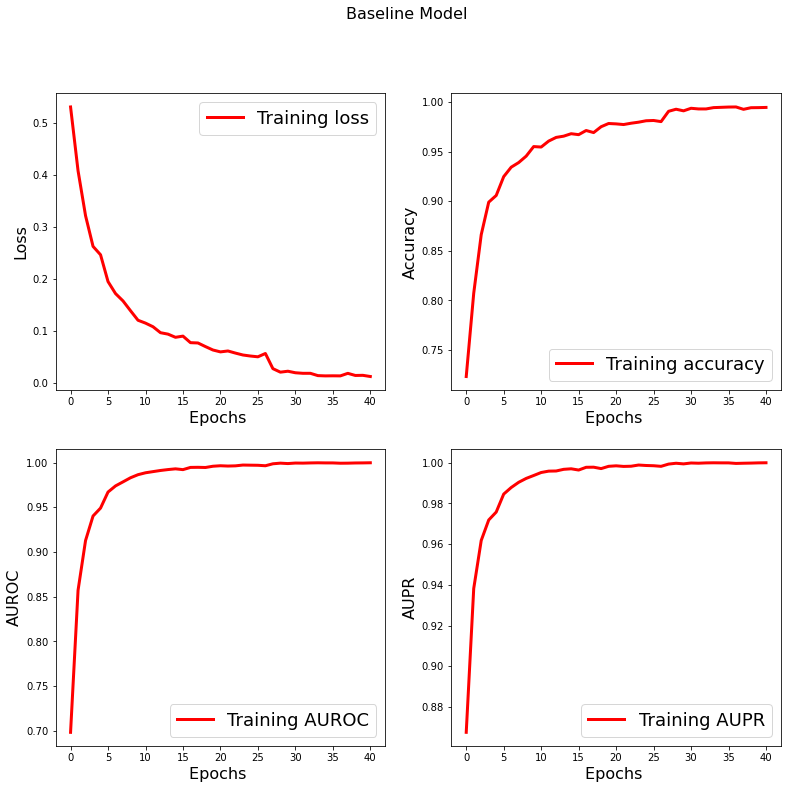

In [120]:
loss = history.history['loss'] #+ history2.history['loss'] + history3.history['loss'] 
accuracy = history.history['acc']# + history2.history['acc'] + history3.history['acc']
aucpr = history.history['auc_3']
aucroc = history.history['auc_2']

plt.figure(figsize=(13,12))
plt.suptitle("Baseline Model",fontsize=16)

plt.subplot(2,2,1)
plt.plot(loss,'r',linewidth=3.0)
plt.legend(['Training loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)  

plt.subplot(2,2,2)
plt.plot(accuracy,'r',linewidth=3.0) 
plt.legend(['Training accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16)

plt.subplot(2,2,3)
plt.plot(aucroc,'r',linewidth=3.0) 
plt.legend(['Training AUROC'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('AUROC',fontsize=16)

plt.subplot(2,2,4)
plt.plot(aucpr,'r',linewidth=3.0) 
plt.legend(['Training AUPR'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('AUPR',fontsize=16)

Normalized confusion matrix
[[0.99011125 0.00988875]
 [0.00618459 0.99381541]]


<Figure size 432x288 with 0 Axes>

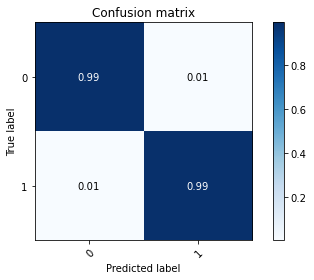

In [121]:
cnf_matrix = confusion_matrix(Y_test, pred_test)
class_names = [str(i) for i in range(2)]

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True)
plt.show()